# 探討公共運輸搭乘量與天氣狀態的關係-以台北為例

### 本研究希望觀察捷運總運量與天氣之間的關係，從中央氣象局紀錄的眾多天氣數據中，選擇降雨量與平均氣溫作為分析變因

## 1. 台北捷運每日的進出站流量統計
### 先取得台北捷運系統於六月份不同日期的進出站流量

In [193]:
import pandas as pd

url = 'http://web.metro.taipei/RidershipCounts/c/10606.htm'
df = pd.read_html(url,skiprows = 1)[0] #pd.read_html()會回傳DataFrame的list
df

,0,1,2
0,營運日,星期,總 運 量
1,106/6/1,四,2108733
2,106/6/2,五,2065402
3,106/6/3,六,1961183
4,106/6/4,日,1509777
5,106/6/5,一,2038718
6,106/6/6,二,2077458
7,106/6/7,三,2099442
8,106/6/8,四,2097434
9,106/6/9,五,2290857


### 從表格中可以看出民國106年6月份不同日期台北捷運系統的總流量
### 將表格依不同日期圖表化後

In [110]:
import pandas as pd

plt.rcParams['font.sans-serif'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False

url = 'http://web.metro.taipei/RidershipCounts/c/10606.htm'
df = pd.read_html(url,skiprows = 1)[0] #pd.read_html()會回傳DataFrame的list
df.columns = df.loc[0] #row 0 to column name 
df = df.drop(0).reset_index(drop=True) #drop row 0 and reset_index
new_df = df.iloc[0:30,0:3]
new_df['總 運 量'].dropna()
new_df['總 運 量'] = new_df['總 運 量'].astype('int') 

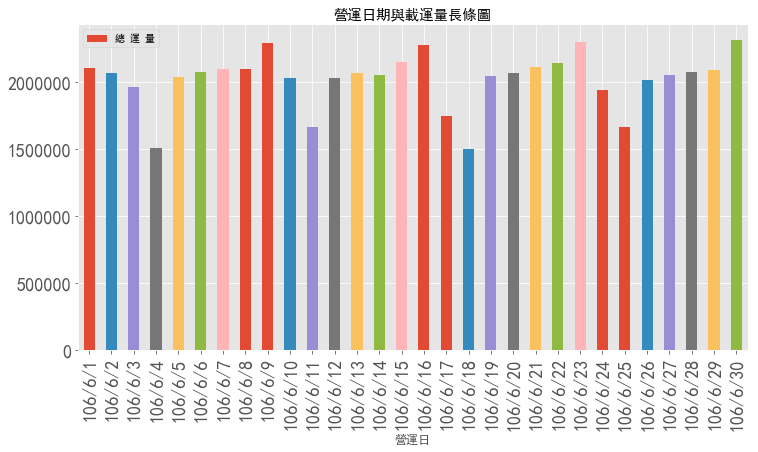

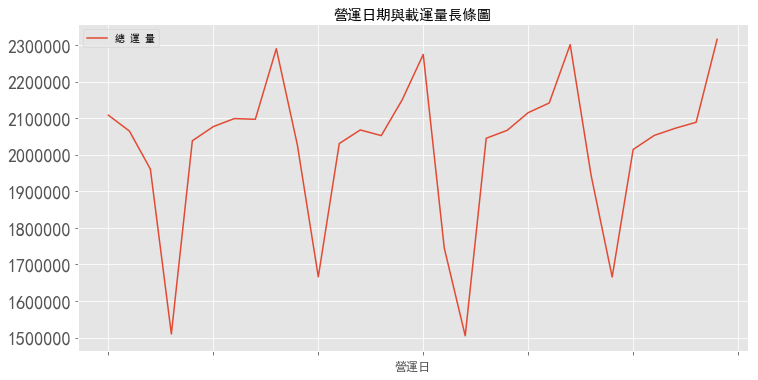

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

p1 = new_df[:30].plot(kind='bar',y='總 運 量',x='營運日',figsize=(12,6),fontsize=18,title='營運日期與載運量長條圖')

p2 = new_df[:30].plot(kind='line',y='總 運 量',x='營運日',figsize=(12,6),fontsize=18,title='營運日期與載運量長條圖')

## 2.取得氣象局於2017年(民國106年)6月的氣象觀測資料

In [187]:
import pandas as pd

url = 'https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-06'
df = pd.read_html(url,encoding = 'utf-8')
print(df[0].head(3))
df[1].head(5)

              0   1             2   3
0  測站:466920_臺北 NaN  觀測時間:2017-06 NaN


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,NaN,press,temperature,Dew Point,RH,WS/WD,Precp,SunShine,visibility,Evaperation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,觀測時間(LST)ObsTime,測站氣壓(hPa)StnPres,海平面氣壓(hPa)SeaPres,測站最高氣壓(hPa)StnPresMax,測站最高氣壓時間(LST)StnPresMaxTime,測站最低氣壓(hPa)StnPresMin,測站最低氣壓時間(LST)StnPresMinTime,氣溫(℃)Temperature,最高氣溫(℃)T Max,最高氣溫時間(LST)T Max Time,...,降水時數(hr)PrecpHour,10分鐘最大降水量(mm)PrecpMax10,10分鐘最大降水起始時間(LST)PrecpMax10Time,一小時最大降水量(mm)PrecpHrMax,一小時最大降水量起始時間(LST)PrecpHrMaxTime,日照時數(hr)SunShine,日照率(%)SunShineRate,全天空日射量(MJ/㎡)GloblRad,能見度(km)VisbMean,A型蒸發量(mm)EvapA
2,1,998.3,1001.7,1000.3,2017-06-01 06:08,995.9,2017-06-01 16:06,30.1,34.1,2017-06-01 12:45,...,0.0,0.0,NaN,0.0,NaN,3.1,22.9,17.68,23.0,-4.3
3,2,998.6,1002.0,1002.1,2017-06-02 22:03,995.8,2017-06-02 01:43,25.5,29.4,2017-06-02 09:07,...,17.6,20.5,2017-06-02 11:12,84.0,2017-06-02 11:12,0.0,0.0,0.99,13.8,X
4,3,1001.0,1004.5,1002.4,2017-06-03 20:02,999.4,2017-06-03 15:57,24.6,26.0,2017-06-03 09:32,...,13.3,10.0,2017-06-03 18:26,36.5,2017-06-03 17:48,0.0,0.0,1.93,7.0,X


### 分別取出氣溫及降水量的紀錄

In [224]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2017-06'
df = pd.read_html(url,encoding = 'utf-8')

avg_temp = df[1][7]#氣溫
rain = df[1][21]#降水量

### 從表格中取得降水量資料，並視覺化成圖表

In [135]:
rain[9] = 0.0 #將缺值視為0.0
rains = pd.DataFrame(rain)
rains.columns = rains.loc[0] #row 0 to column name 
rains = rains.drop(0).reset_index(drop=True) #drop row 0 and reset_index
rains = rains[1:31].astype('float')
rains.columns = ['降水量(mm)Precp']
rains

,降水量(mm)Precp
1,0.0
2,163.0
3,159.5
4,17.5
5,0.1
6,0.0
7,0.0
8,0.0
9,0.0
10,4.5


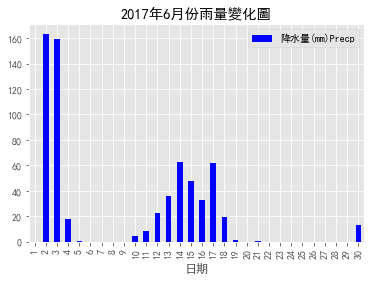

In [40]:
import pandas as pd
import numpy as np
rains.plot(kind='bar',y = '降水量(mm)Precp' , title='2017年6月份雨量變化圖',color = 'blue')
plt.xlabel('日期')
plt.show()

### 接著將降水量與運輸量疊圖做比較

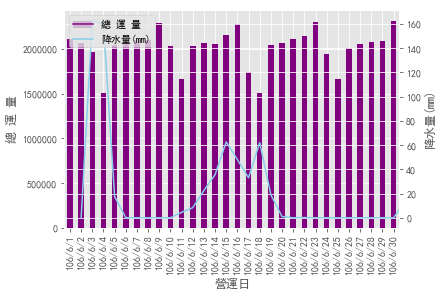

In [230]:
#疊圖分析
import matplotlib.lines as mlines

plt.rcParams['font.sans-serif'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False

p3 = new_df[:30].plot(kind='bar',y='總 運 量',x='營運日',color='purple')
plt.ylabel('總 運 量')


p4 = p3.twinx()
p4.set_ylabel('降水量')
p4.plot(rains, color='skyblue')


plt.ylabel('降水量(mm)')
blue_line = mlines.Line2D([],[],linestyle='-',color='purple',markersize=2, label=u'總 運 量')
red_line= mlines.Line2D([],[],linestyle='-',color='skyblue',markersize=2, label=u'降水量(mm)')
plt.legend(handles=[blue_line,red_line],loc='upper left')
plt.grid(True)
plt.show()

### 然後取得不同日期的常溫資料，並視覺化成圖表

In [32]:
avg = pd.DataFrame(avg_temp)
avg.columns = avg.loc[0] #row 0 to column name 
avg = avg.drop(0).reset_index(drop=True) #drop row 0 and reset_index
avg= avg[1:31].astype('float')
avg.columns = ['氣溫(℃)Temperature']
avg

,氣溫(℃)Temperature
1,30.1
2,25.5
3,24.6
4,25.2
5,27.8
6,29.2
7,30.1
8,29.3
9,30.0
10,29.1


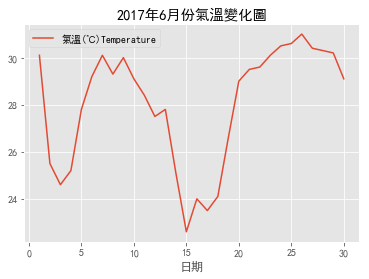

In [41]:
#avg_temp.columns = avg_temp.loc[0] #row 0 to column name 
#avg_temp = avg_temp.drop(0).reset_index(drop=True) #drop row 0 and reset_index
avg = avg.astype('float')
avg.plot(kind='line',y = '氣溫(℃)Temperature', title='2017年6月份氣溫變化圖')
plt.xlabel('日期')
plt.show()

### 將氣溫變化圖與運量變化疊合觀察

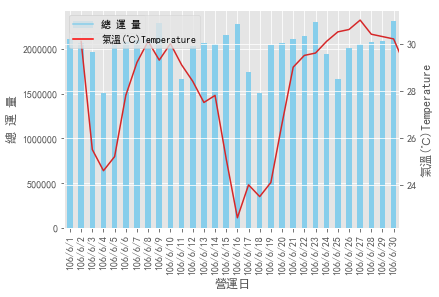

In [105]:
#疊圖分析
import matplotlib.lines as mlines

plt.rcParams['font.sans-serif'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False

p1 = new_df[:30].plot(kind='bar',y='總 運 量',x='營運日',color='skyblue')
plt.ylabel('總 運 量')


p2 = p1.twinx()
p2.set_ylabel('氣溫(℃)Temperature')
p2.plot(avg, color=color)


plt.ylabel('氣溫(℃)Temperature')
blue_line = mlines.Line2D([],[],linestyle='-',color='skyblue',markersize=2, label=u'總 運 量')
red_line= mlines.Line2D([],[],linestyle='-',color='red',markersize=2, label=u'氣溫(℃)Temperature')
plt.legend(handles=[blue_line,red_line],loc='upper left')
plt.grid(True)
plt.show()

## 3.結論
### 先從溫度與運量的關係來看

### 從圖中可看出，溫度高低與總運量並無直接關係
### 從兩者間相關係數的運算結果看

In [185]:
data1 = pd.DataFrame()#新建一個dataframe

c = pd.Series(avg_temp[2:32])#將雨量資料轉成series型別

list_c = list(c)
b = list(df[2][1:31])#將兩筆資料轉成list

list_c[:] = [float(x) for x in list_c]
b[:] = [int(x) for x in b]#將list內的資料轉乘數值型態(int，float)

data1['氣溫'] = list_c
data1['總運量'] = b#存入新建的dataframe

data1.corr()#印出相關係數

,氣溫,總運量
氣溫,1.000000,0.286772
總運量,0.286772,1.000000


### 可以發現兩者間的相關係數並不高
### 接著看雨量與運量的關係

In [178]:
data = pd.DataFrame()#新建一個dataframe

a = pd.Series(rain[2:32])#將雨量資料轉成series型別

list_a = list(a)
b = list(df[2][1:31])#將兩筆資料轉成list

list_a[:] = [float(x) for x in list_a]
b[:] = [int(x) for x in b]#將list內的資料轉乘數值型態(int，float)

data['雨量'] = list_a
data['總運量'] = b#存入新建的dataframe

data.corr()#印出相關係數

,雨量,總運量
雨量,1.000000,-0.070721
總運量,-0.070721,1.000000


### 兩者間的相關係數也不高

### 但是我們回顧之前的圖表
### 在印出一個月的運量變化圖時，我發現好像有一定的規律性存在

### 將運量資料依照不同的星期分群後存入一個新的dataframe

In [216]:
data2 = pd.DataFrame()#新建一個dataframe


e = list(df[2][1:31])
f = list(df[1][1:31])

e[:] = [int(x) for x in e]#將list內的資料轉乘數值型態(int，float)

data2['星期幾'] = f
data2['總運量'] = e#存入新建的dataframe

data3 = data2.groupby('星期幾').sum()
data3


,總運量
星期幾,
一,8130172
三,8340805
二,8266235
五,11249641
六,7678140
四,10588692
日,6346317


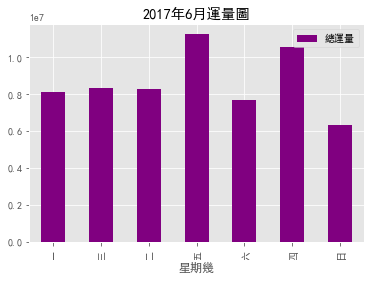

In [203]:
data3.plot(kind='bar',y = '總運量' , title='2017年6月運量圖',color = 'purple')
plt.xlabel('星期幾')
plt.show()

### 從圖表中可以發現，星期四和星期五中的運量是最高的
### 而星期六、日的運量相較於星期四、五則明顯下降許多，到了星期日達到一周的最低運量
### 搭配前面的圖形更能說明運量的規律性

### 在這個規律性中我的解讀是，對於上班日(假定星期一到星期五)時捷運的運量維持較高的穩定運量，而到了周末時
### 捷運的運量明顯下滑了，代表上班上課日時捷運為一主要大眾運輸工具；但是假日時，捷運的運輸量明顯低於上班上課日的運量，推測可能的原因有兩種:
### 1. 假日時可能有較多的觀光人次，理應提高大眾運輸的運輸量但卻沒有提高，可能是捷運需求不能完全符合觀光客
### 2. 本地居民於平常上班上課日後，假日時傾向待在家裡休息或出門改透過其他運輸方式，例如自行開車出遊、騎單車運動等戶外活動，因此造成捷運運輸量明顯下滑

# 對於我觀察得到的結論
###